In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline



In [127]:
def plot_histogram(samples,xtitle,ytitle, title, nbins, limits, error = None):
    
    #Plot the histogram of the sampled data with nbins and a nice color
    
    plt.figure()
    n, bins, patches =plt.hist(samples, bins=nbins, range = limits, color=(0,0.7,0.9))  #Set the color using (r,g,b) values or
                                                                  #  use a built-in matplotlib color""" 
    bincenters = 0.5*(bins[1:]+bins[:-1])
    errs = np.sqrt(n)
    
    plt.errorbar(bincenters, n, yerr=errs, fmt='none')
    #Add some axis labels and a descriptive title
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(title)

    #Get rid of the extra white space on the left/right edges (you can delete these two lines without a problem)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([limits[0],limits[1],ymin,ymax])

    #Not necessarily needed in a Jupyter notebook, but it doesn't hurt
    plt.show()
    return n, bincenters, patches, errs

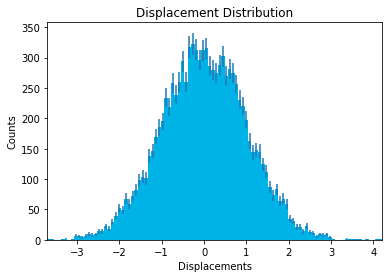

In [128]:
N = 10000
displacements = np.random.randn(N)
lims = [np.min(displacements), np.max(displacements)]
nbins = 100
n, bincenters, patches, error = plot_histogram(displacements, "Displacements", "Counts",
                                               "Displacement Distribution", nbins, lims)

In [4]:
cumulative = np.cumsum(displacements)
timesteps = np.linspace(1,N,N)

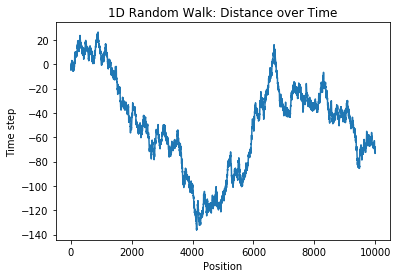

In [5]:
plt.figure()
plt.title("1D Random Walk: Distance over Time")
plt.xlabel("Position")
plt.ylabel("Time step")
plt.plot(timesteps, cumulative)
plt.show()

In [6]:
# 2D Simulation

cumulativex = np.cumsum(np.random.randn(N))
cumulativey = np.cumsum(np.random.randn(N))

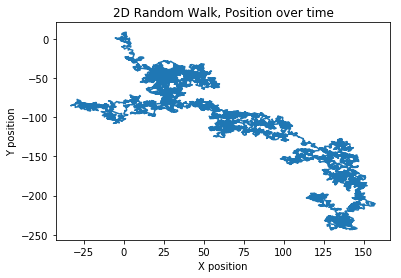

In [7]:
plt.figure()
plt.plot(cumulativex, cumulativey)
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("2D Random Walk, Position over time")
plt.show()

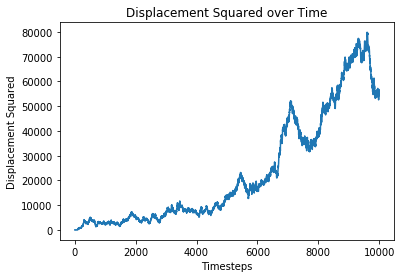

In [8]:
# Displacement Squared
# Since simulated particle always starts at position = (0,0), no need to subtract off initial position

disp2 = (cumulativex)**2 + (cumulativey)**2
plt.figure()
plt.title("Displacement Squared over Time")
plt.plot(timesteps, disp2)
plt.xlabel("Timesteps")
plt.ylabel("Displacement Squared")
plt.show()

In [9]:
# Theoretical Value of D
# D = k_b * T / (3 pi eta d)

d = 1.0e-6 # diameter in meters
eta = 1.0e-3 # viscosity of water in SI units (Pascal-seconds, 293K)
kb = 1.38e-23 # Boltzmann Constant in Si Units
T = 293 # Temperature in Kelvin

def get_D(diameter, visc, temp):
    kb = 1.38e-23
    return kb*T/(3 * np.pi * visc * diameter) # Units: m^2 /s
 
exampleD = get_D(d, eta, T)
print(exampleD, "m^2/s")

4.2901806459851315e-13 m^2/s


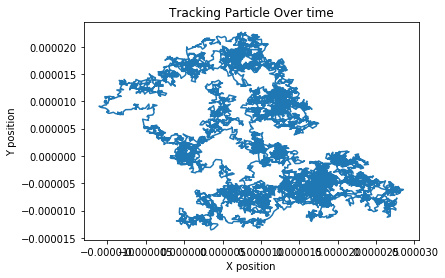

In [10]:
# Displacement using the Diffusion constant

dimensions = 2
tau = 0.1
times = tau * np.linspace(1,N,N)

k = np.sqrt(exampleD * dimensions * tau)
dx = k * np.random.randn(N)
dy = k * np.random.randn(N)

x = np.cumsum(dx)
y = np.cumsum(dy)

dsquaredisplacement = (dx**2) + (dy**2)
squaredisplacement = (x**2) + (y**2)

plt.figure()

plt.title("Tracking Particle Over time")
plt.xlabel('X position')
plt.ylabel('Y position')
plt.plot(x,y)
plt.show()

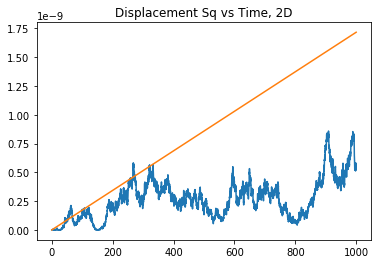

In [11]:
# Squared Displacement Plot

plt.figure()
plt.title("Displacement Sq vs Time, 2D")
plt.plot(times, squaredisplacement)
plt.plot(times, np.arange(0,N,1)*2*(k**2))

plt.show()

In [12]:
# Two Different beads in glycerol: (Room Temperature)


d1 = 0.47*(10**(-6)) # meters
d2 = 0.96*(10**(-6)) # meters

eta1 = 1.66*(10**(-3)) # converting to Pascal*seconds
eta2 = 4.65*(10**(-3))
eta3 = 13.2*(10**(-3))


D11 = get_D(d1, eta1, 293)
D12 = get_D(d1, eta2, 293)
D13 = get_D(d1, eta3, 293)
D21 = get_D(d2, eta1, 293)
D22 = get_D(d2, eta2, 293)
D23 = get_D(d2, eta3, 293)

Ds = [D11, D12, D13, D21, D22, D23]


In [78]:
Ds

[5.498821643149361e-13,
 1.9630201994898793e-13,
 6.91518479365753e-14,
 2.6921314294585414e-13,
 9.610619726669199e-14,
 3.385559221894832e-14]

In [13]:
def simulate_D(N, givenD, dims, tau):
    
    times = tau * np.linspace(1,N,N)

    k = np.sqrt(givenD * dims * tau)
    dx = k * np.random.randn(N)
    dy = k * np.random.randn(N)

    x = np.cumsum(dx)
    y = np.cumsum(dy)

    dsquaredisplacement = (dx**2) + (dy**2)
    squaredisplacement = (x**2) + (y**2)
    
    simD = np.mean(dsquaredisplacement) / (2 * dims * tau)
    
    standarderr = np.std(dsquaredisplacement) / (2 * dims * tau * np.sqrt(N))
    actualerr = givenD - simD
    
    return squaredisplacement, simD, standarderr, actualerr

In [99]:
autos = []
for i in range(0, 100):
    seed = 123456 + i
    np.random.seed(seed)
    
    sqdisp, simD, sterr, aerr = simulate_D(N, Ds[0], dimensions, tau)
    autocorrelation = np.correlate(sqdisp, sqdisp, mode='full')
    autocorrelation = autocorrelation[autocorrelation.size//2:]
    avgauto = np.mean(autocorrelation)
    autos.append(avgauto)



100
Mean of autocorr distribution: 9.287256516157759e-15 +/- 1.7516715077064483e-14


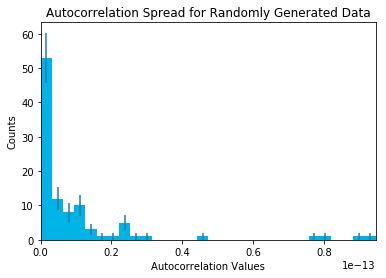

(array([53., 12.,  8., 10.,  3.,  1.,  1.,  5.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  1.]),
 array([1.63270185e-15, 4.78540097e-15, 7.93810008e-15, 1.10907992e-14,
        1.42434983e-14, 1.73961974e-14, 2.05488965e-14, 2.37015956e-14,
        2.68542948e-14, 3.00069939e-14, 3.31596930e-14, 3.63123921e-14,
        3.94650912e-14, 4.26177903e-14, 4.57704894e-14, 4.89231885e-14,
        5.20758877e-14, 5.52285868e-14, 5.83812859e-14, 6.15339850e-14,
        6.46866841e-14, 6.78393832e-14, 7.09920823e-14, 7.41447814e-14,
        7.72974806e-14, 8.04501797e-14, 8.36028788e-14, 8.67555779e-14,
        8.99082770e-14, 9.30609761e-14]),
 <a list of 30 Patch objects>,
 array([7.28010989, 3.46410162, 2.82842712, 3.16227766, 1.73205081,
        1.        , 1.        , 2.23606798, 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ,

In [122]:
print(len(autos))
print("Mean of autocorr distribution:", np.mean(autos), "+/-", np.std(autos))
plot_histogram(autos, 'Autocorrelation Values', 'Counts', "Autocorrelation Spread for Randomly Generated Data",
                                nbins = 30, limits = [np.min(autos), np.max(autos)])



Analytical D11 = 5.498821643149361e-13
Average Autocorrelation Constant: 8.786957728396471e-15
Analytical D12 = 1.9630201994898793e-13
Average Autocorrelation Constant: 6.543875330871866e-16
Analytical D13 = 6.91518479365753e-14
Average Autocorrelation Constant: 4.833514930255139e-18
Analytical D21 = 2.6921314294585414e-13
Average Autocorrelation Constant: 3.7787746271340867e-16
Analytical D22 = 9.610619726669199e-14
Average Autocorrelation Constant: 8.202360025424383e-17
Analytical D23 = 3.385559221894832e-14
Average Autocorrelation Constant: 1.959100487528553e-17


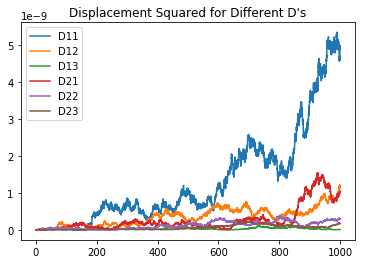

In [87]:
times = tau * np.linspace(1,N,N)
strings = ["D11",'D12','D13', 'D21', 'D22', 'D23']

plt.figure()
plt.title("Displacement Squared for Different D's")
for i in range(len(Ds)):
    sqdisp, simD, sterr, actualerr = simulate_D(N, Ds[i], dimensions, tau)
    
    autocorrelation = np.correlate(sqdisp, sqdisp, mode="full")
    print("Analytical", strings[i] ,"=", Ds[i])
    #print("Simulated", strings[i],  "=", simD, "+/-", sterr)
    
    print("Average Autocorrelation Constant:", np.mean(autocorrelation))
    
    plt.plot(times, sqdisp, label = strings[i])

plt.legend()
plt.show()

In [102]:
import pandas as pd

def filter_array(array,zscore=2):
    """
    Input: an array/list and a z-score (default is 2)
    
    Output: the array with data at its tails cut off at the zscore
    
    Used to remove outliers in any data by specifying how many standard deviations
    one wishes to keep
    """
    data = np.array(array)
        
    sDev = np.std(data)
    mean = np.mean(data)
        
    centered_data = (data-mean)/sDev
        
    filtered_data = np.array([entry for entry in centered_data if np.abs(entry) <= zscore])
        
    converted_back = filtered_data*sDev+mean
        
    return converted_back


class BMC_data():
    """
    An object created from BMC particle data, 
    represented by a Pandas dataframe and manipulations thereof
    
    
    How to use:
    
    If you have a .txt containing data from BMC, you will call 
    an instance of this class with the BMC file as an argument. 
    For example, consider BMC data stored in "Particles.txt".
    Bring it in with the following command:
    
    >>> whateverNameYouWant = BMC('Particles.txt')
    
    With this file uploaded, there are many things you can do to
    manipulate the data in useful ways. Manipulations of the data
    are called methods, while their inherent properties are going 
    to be stored as attributes.
    

    *************************************************************
    *************************************************************
                    BMC Attributes and Methods
                       (Your analysis toolbox)
    *************************************************************
    *************************************************************
    
    
    ------------------------Attributes---------------------------

    
    .table                            Your data as a table that can be 
                                      manipulated (Pandas)
    
    .table_size                       How many rows of data are available
    
    .truth                            A Boolean version of .table where rows that 
                                      are particle headers are True, and the data 
                                      are all False
                        
    .particleNumber                   The number of tracked objects
    
    .particle_num_index               Array of indices (rows) that give the location of each
                                      particle's header
        
    .events_for_particle              Array giving the number of timesteps each
                                      particle was tracked for
    
    
    ------------------------Methods------------------------------



    .pull_particle()                  Picks out the data for one particle at a time as a 
                                      table
    
    .convert_units()                  Scales all spatial data by some input
    
    .plot_trajectory()                Plots x vs y for a single particle 
    
    .plot_trajectories()              Plots x vs y for all particles
    
    .get_avg_speed()                  Returns an array of total change in 
                                      position/total change in time for every particle
                                  
    .plot_displacementSingle()        Plots total displacement versus time for one particle
    
    .plot_displacementAll()           Plots total displacement versus time for all particles

    .compute_diffusionSingle()        Finds the diffusion constant for a single particle

    .compute_diffusionAll()           Finds the diffusion constant for all particles,
                                      weighted by the length of time for which they were
                                      tracked
                                  
    .avgInstantaneous_speedSingle()   Finds the average instantaneous speed for a single 
                                      particle

    .avgInstantaneous_speedAll()      Returns an array of the average instantaneous speeds
                                      with the option to filter them by z score
                                  
    *************************************************************
    *************************************************************
    
    The use of a method depends on its parameters, but the basics of each
    are the same. Calling an attribute is a little easier. Let's look at an example.
    
    First, we load in our data. Let's just call it "data".
    
    >>> data = BMC_data('Particles.txt')
    
    Now that the we have this object called "data", we can manipulate it.
    Let's check an attribute, such as the size of the table.
    
    In [42]: data.table_size
    
             2071
    
    Great, the data has 2071 rows of data. Notice that there were 
    NOT parantheses on table_size. Methods, on the other hand, have parantheses.
    Let's call a method for contrast.
    
    In [43]: data.avgInstantaneous_speedSingle(whichParticle=5)
             
             2.71828182845
             
    To call the average instantaneous speed method, we simply chose which particle's 
    speed we wanted to observe and plugged it into the parantheses. 
    
    
    For examples of specifics in each method, look at the documentation below for examples.
    
                                  
    
    """

   ### Please email mikelawrence@berkeley.edu with any comments or corrections ###

            
        
    ### Attributes###
        
    def __init__(self,BMC_file):    

        
        self.table = pd.read_table(BMC_file,sep = r'\s+')
        self.table_size = len(self.table['x'])
        self.truth = self.table.isnull()
        self.particleNumber = np.count_nonzero(self.truth['y'])
    
    
        ####################################################################
        ####################################################################
        
        """
        1) Takes the data in its table form
        2) looks for locations in the data where a new particle begins
        3) notes the new particle's row index in the table (particleLocationArray)
        4) notes how many data points/rows are associated with that particle (particleEventArray) 
        """
        
        particle_num_index = []
        events_for_particle = []
    
        for index in np.arange(self.table_size):
        
            if self.truth['y'][index]:
                events_for_particle.append(self.table['x'][index])
                particle_num_index.append(index)
        
        
        self.particleLocationArray = particle_num_index
        self.particleEventArray = events_for_particle
        
        ####################################################################
        ####################################################################
 


    ### Methods ###
    
    def pull_particle(self,whichParticle,skipFirstLine = False):
        """    
        Return dataframe of only one particle's data (whichParticle, an integer). Skipping the first line is useful
        if your analysis is independent or sensitive to the starting values being 0,
        i.e. having to divide by 0
    
        for N particles in a set of data, 
        0 <= whichParticle <= N
        (whichParticle is an integer, e.g. whichParticle = 2)
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.pull_particle(whichParticle=5)
        
        {Output: a table containing only the selected data}
        
        This loads in particles.txt, names it data, then selects the subset of the data belonging to 
        particle 6 (Python indexing starts at 0).
        """      
        first_index = int(self.particleLocationArray[whichParticle] + 1 + skipFirstLine)
        final_index = int(first_index + self.particleEventArray[whichParticle] - skipFirstLine)
    
        return self.table[first_index:final_index]
    

    def convert_units(self,conversion_factor):
        """
        Given a conversion factor, scales the spatial data
        ##### Use this ONCE if you didn't scale your data in the BMC software #####
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.convert_units(10**-6)
        
        {Output: the original data as a table, but scaled}
        """
        rows_with_data = self.truth['y'] == False
        
        self.table['x'][rows_with_data] = self.table['x']*conversion_factor
        self.table['y'][rows_with_data] = self.table['y']*conversion_factor
        self.table['dx'][rows_with_data] = self.table['dx']*conversion_factor
        self.table['dy'][rows_with_data] = self.table['dy']*conversion_factor
        
        self.table['dr^2'][rows_with_data] = self.table['dr^2']*conversion_factor**2
        self.table['TotalDisplacementSquared'][rows_with_data] = self.table['TotalDisplacementSquared']*conversion_factor**2
        
        return self.table

    def plot_trajectory(self, whichParticle,xLabel='x position',yLabel='y position',plotTitle='Particle Trajectory'):
        """
        Takes in a particle number. Optional x and y axis labels, as well as title of plot.
        
        Returns plot of particle's position in x and y over time
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.plot_trajectory(whichParticle=5,xLabel='Brownian',yLabel='Motion',plotTitle='111B is *great*')
        
        {Output: a plot with only one particle's data}
        """
        data = self.pull_particle(whichParticle)
        
        x_data = data['x']
        y_data = data['y']
    
        plt.plot(x_data,y_data,lw=2)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.title(plotTitle)
        
        
    def plot_trajectories(self, xLabel='x position',yLabel='y position',plotTitle='Particle Trajectory'):   
        
        """
        Same usage as plot trajectory, but automatically plots every particle. 

        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.plot_trajectories()
        
        {Output: a plot of all particles}
        """
        for particle in np.arange(self.particleNumber):
            self.plot_trajectory(whichParticle=particle,xLabel=xLabel,yLabel=yLabel,plotTitle=plotTitle)
    
    def get_avg_speed(self):
        """
        Return the average speed of every particle as a numpy array
        Calculated as final displacement/change in time
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.get_avg_speed()
        
        {Output: an array with an entry for each particle}
        """
        velocities = []

        for particle in np.arange(self.particleNumber):
        
            particleData = self.pull_particle(whichParticle=particle)      
            
            totalTime = np.sum(particleData['dt'])
            distances = list(particleData['TotalDisplacementSquared'])
            
            final_distance = distances[-1]**0.5
        
            avgVelocity = final_distance/totalTime
            
            velocities.append(avgVelocity)
    
        return np.array(velocities)    
    
    def plot_displacementSingle(self,whichParticle,xLabel='time (s)',yLabel='Displacement Squared (units squared)',plotTitle=''):
        
        '''
        Takes in a single particle by its number (integer)
        Optional: rename the x and y axes (meters or pixels), add a title
        
        Return a plot of the particle's net squared displacement versus time
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.plot_displacementSingle(whichParticle=100,plotTitle='Figure 6')
        
        {Output: a plot of one particle}
        '''
        
        data = self.pull_particle(whichParticle)
        
        displacements = data['TotalDisplacementSquared']
        time = data['time']
        
        plt.plot(time,displacements)
        
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.title(plotTitle)
    
    def plot_displacementAll(self,xLabel='time (s)',yLabel='Displacement Squared (units squared)',plotTitle=''):
        """
        Plots the displacement squared versus time for every particle, in the fashion of plot_displacementSingle.
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.plot_displacementAll(plotTitle='Squared Displacement versus Time')
        
        {Output: a plot with all of your particles}
        """
        for particle in np.arange(self.particleNumber):
            self.plot_displacementSingle(particle,xLabel=xLabel,yLabel=yLabel,plotTitle=plotTitle)
        
    def compute_diffusionSingle(self,whichParticle):
        """
        Uses the calculation from "Simulating Brownian Motion" to calculate D for a single particle.

        Takes in a single particle (integer)
        Return diffusion coefficient for that particle

        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.compute_diffusionSingle(12)

        {Output: a single number}

        """
        dimension = 2

        data = self.pull_particle(whichParticle)

        #numerator = np.sum(data['TotalDisplacementSquared']*data['time'])     <- original line 
        #denominator = 4*np.sum(data['time']*data['time'])     <- original line

        numerator =  np.mean(data['dr^2'])
        denominator = 2*dimension*np.mean(data['dt'])
        
        N = len(data['dt'])
        standarderr = np.std(data['dr^2']) / (2 * dimension * np.mean(data['dt']) * np.sqrt(N))

        return numerator/denominator, standarderr
        
    def compute_diffusionAll(self,averaged=True):
        """
        Computes the diffusion coefficient for every particle
        
        if averaged is True, returns the average diffusion coefficient weighted by how 
        long the particle was tracked for (useful for comparing with simulation/BMC software)
        
        if averaged is set to False, returns an array of every diffusion coefficient 
        (useful for checking the distribution to find outliers, bulk flow, etc)

        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.compute_diffusionAll(averaged=False)
        
        {Output: an array or single value}
        """     
        
        diffusion_coefficients = []
        errs = []
        weights = self.particleEventArray/sum(self.particleEventArray)
        
        for particle in np.arange(self.particleNumber):
            
            diffusion_coefficient = self.compute_diffusionSingle(whichParticle=particle)[0]
            diffusion_coeff_errs = self.compute_diffusionSingle(whichParticle=particle)[1]
            errs.append(diffusion_coeff_errs)
            diffusion_coefficients.append(diffusion_coefficient)
        
        weighted_total_diffusion = sum(diffusion_coefficients*weights)
        weighted_total_error = sum(errs*weights)
        
        values = np.array(diffusion_coefficients)
        
        if averaged:
            values = weighted_total_diffusion
            errs = weighted_total_error
        
        return values, errs
    
    def avgInstantaneous_speedSingle(self,whichParticle):
        """
        Given a particle, calculates the magnitude of its instantaneous velocity for all time steps, then averages them
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.avgInstantaneous_speedSingle(70)
        
        {Output: a number}
        """
        data = self.pull_particle(whichParticle,skipFirstLine=True)
        
        dxdt = data['dx']/data['dt']
        dydt = data['dy']/data['dt']
        
        magnitudes = np.array((dxdt**2 + dydt**2)**0.5)
        
        return np.mean(magnitudes)
    
    def avgInstantaneous_speedAll(self,filterData=False,zscore=2):
        """
        Calculates the average instantaneous speed for every particle,
        Returns them as an array
        
        Has the option to filter the data by some zscore (number of stand deviations to keep) to remove super fast particles.
        This is useful to reduce representation of bulk flow, table bumps, and tracking errors in the final data.
        Its other use may be to compare distributions of tracked objects with simulation or other known distributions.
        
        Example:
        >>> data = BMC_data('Particles.txt')
        >>> data.avgInstantaneous_speedAll(filterData=True,zscore=2)
        
        {Output: some filtered data array}
        """
        avg_vels = np.array([])

        for particle in np.arange(self.particleNumber):
            avg_vels = np.append(avg_vels,self.avgInstantaneous_speedSingle(particle))
            
        if filterData:
            avg_vels = filter_array(avg_vels,zscore=zscore)
        
        return avg_vels

In [136]:
onion_data = BMC_data('Actin Near Cell Wall.txt')
bead_data = BMC_data('pt47_1pt66cP_glyc_2.txt')


### FOR CALIBRATION OF DATA
calib20x = 0.352 #um/pixel
calib40x = 0.173 #um/pixel

beads_scale = 0.25 #um/pixel
onion_scale = 1 #m/pixel

beads_factor = calib20x/beads_scale
onion_factor = calib40x*(10**(-6)) # to meters for final conversion

### RUN THIS ONE TIME (or rerun the original data load)
onion_data.convert_units(onion_factor)
# onion_data.table.fillna(0)

bead_data.convert_units(beads_factor)
# bead_data.table.fillna(0)

b0 = BMC_data('pt47_1pt66cP_20x_PVP.txt')
b0.convert_units(beads_factor)
b0avg = b0.compute_diffusionAll(averaged=True)
print(b0avg)

# b1 = BMC_data('pt47_1pt66cP_20x_PVP_1.txt')
# b1.convert_units(beads_factor)
# b1avg = b1.compute_diffusionAll(averaged=True)
# print(b1avg)

# b2 = BMC_data('pt47_1pt66cP_20x_PVP_2.txt')
# b2.convert_units(beads_factor)
# print(b2.compute_diffusionAll(averaged=True))

b1 = BMC_data('pt47_1pt66cP_glyc.txt')
b1.convert_units(beads_factor)
print(b1.compute_diffusionAll(averaged=True))

# b4 = BMC_data('pt47_1pt66cP_glyc_1.txt')
# b4.convert_units(beads_factor)
# print(b4.compute_diffusionAll(averaged=True))

# b5 = BMC_data('pt47_1pt66cP_glyc_2.txt')
# b5.convert_units(beads_factor)
# print(b5.compute_diffusionAll(averaged=True))

b3 = BMC_data('pt47_4pt65cP_20x_PVP.txt')
b3.convert_units(beads_factor)
print(b3.compute_diffusionAll(averaged=True))

b4 = BMC_data('pt47_4pt65cP_glyc.txt')
b4.convert_units(beads_factor)
print(b4.compute_diffusionAll(averaged=True))

b5 = BMC_data('pt47_13pt2cP_20x_PVP.txt')
b5.convert_units(beads_factor)
print(b5.compute_diffusionAll(averaged=True))

b6 = BMC_data('pt47_13pt2cP_glyc.txt')
b6.convert_units(beads_factor)
print(b6.compute_diffusionAll(averaged=True))

b7 = BMC_data('pt96_1pt66cP_20x_PVP.txt')
b7.convert_units(beads_factor)
print(b7.compute_diffusionAll(averaged=True))

b7 = BMC_data('pt96_1pt66cP_glyc.txt')
b7.convert_units(beads_factor)
print(b7.compute_diffusionAll(averaged=True))

b8 = BMC_data('pt96_4pt65cP_20x_PVP.txt')
b8.convert_units(beads_factor)
print(b8.compute_diffusionAll(averaged=True))

b9 = BMC_data('pt96_4pt65cP_glyc.txt')
b9.convert_units(beads_factor)
print(b9.compute_diffusionAll(averaged=True))

b10 = BMC_data('pt96_13pt2cP_20x_PVP.txt')
b10.convert_units(beads_factor)
print(b10.compute_diffusionAll(averaged=True))

b11 = BMC_data('pt96_13pt2cP_glyc.txt')
b11.convert_units(beads_factor)
print(b11.compute_diffusionAll(averaged=True))

(1.2843321093487278e-13, 4.121228255400429e-14)
(2.568894624841102e-13, 8.793518290935546e-14)
(1.8780477031951424e-13, 7.674357694009598e-14)
(2.2349542716308722e-14, 4.698020023377801e-15)
(7.80072514203677e-14, 3.0110327911682176e-14)
(5.985850912248882e-13, 2.193595947237862e-13)
(1.5985154083332683e-13, 7.198295935178225e-14)
(1.3869858854398347e-13, 5.195096768956627e-14)
(4.0520736755516954e-14, 1.522435917624365e-14)
(4.2203915551785675e-14, 2.7030393460521968e-14)
(8.841386551887562e-14, 4.8443931582588905e-14)
(1.5890552214439263e-14, 2.652915798727413e-15)


In [104]:
givenDiff = np.loadtxt('Diffusion Coefficients Actin.txt')
convertedDiff = givenDiff * 10**(-14) #m^2 /s
print(convertedDiff)



calculatedDiff = onion_data.compute_diffusionAll(averaged=True)
print(calculatedDiff)

[3.89851793e-14 3.88524348e-14 3.46724118e-14 3.55044187e-14
 3.22058798e-14 3.32299803e-14 3.30607374e-14 3.29451633e-14
 3.41603855e-14 3.90073827e-14 3.24164853e-14 3.34055761e-14
 3.52593234e-14 3.86753538e-14 3.95263959e-14]
(1.7436273161831624e-13, 7.58676513407148e-14)


In [17]:
# table = my_data.table.fillna(0)

# x = table['x'].values
# y = table['y'].values
# t = table['time'].values
# dx = table['dx'].values
# dy = table['dy'].values
# dt = table['dt'].values
# dr2 = table['dr^2'].values
# totaldispsq = table['TotalDisplacementSquared'].values

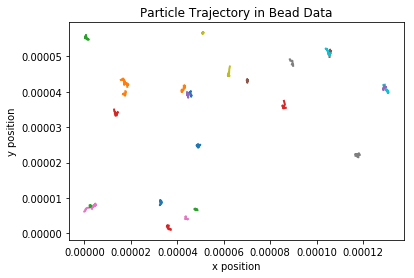

In [120]:
plt.figure()
bead_data.plot_trajectories()
plt.title('Particle Trajectory in Bead Data')
plt.show()

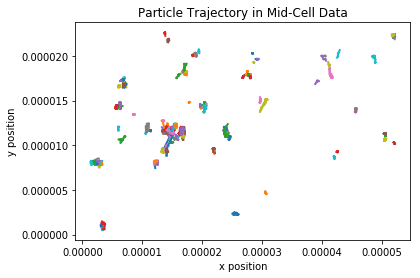

In [121]:
plt.figure()
midcelldata.plot_trajectories()
plt.title('Particle Trajectory in Mid-Cell Data')
plt.show()

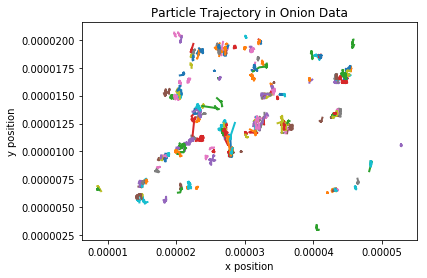

In [119]:
plt.figure()
onion_data.plot_trajectories()
plt.title('Particle Trajectory in Onion Data')
plt.show()

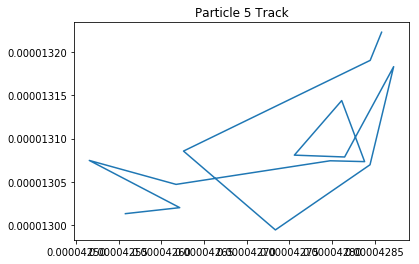

In [19]:
p5x = onion_data.pull_particle(whichParticle=5)['x']
p5y = onion_data.pull_particle(whichParticle=5)['y']
plt.figure()
plt.title("Particle 5 Track")
plt.plot(p5x, p5y)
plt.show()

In [20]:
p5dt = onion_data.pull_particle(whichParticle=5)['dt'][1:]
np.mean(p5dt)

0.03807142857142858

In [21]:
p5disp = onion_data.pull_particle(whichParticle=5)['TotalDisplacementSquared']

p5D = np.mean(p5disp) / (2 * dimensions * 0.163016)
p5D

7.51864807754542e-14

In [22]:
onion_data.compute_diffusionAll(averaged = False)

array([8.88651851e-15, 1.06338289e-13, 4.69496737e-13, 1.05952115e-13,
       1.31414095e-13, 9.67232935e-14, 6.80487629e-14, 1.83538591e-13,
       1.49562643e-13, 1.59331707e-13, 3.63576271e-13, 1.06320703e-13,
       1.52144906e-12, 2.94467855e-13, 2.87704243e-13, 7.19136407e-14,
       6.00970429e-14, 2.79366482e-13, 6.06234743e-14, 1.13863470e-13,
       1.56482675e-13, 1.13641228e-13, 1.35324287e-13, 1.57771987e-13,
       2.89283129e-14, 2.07590892e-13, 3.21380099e-13, 1.99934142e-13,
       1.17397353e-13, 1.62897836e-13, 1.58491535e-13, 1.83983061e-13,
       8.65748181e-14, 1.02792386e-12, 2.02031621e-13, 8.83889293e-14,
       8.63333161e-14, 1.71231429e-13, 9.81951136e-14, 1.33229679e-13,
       1.80938757e-13, 3.12051717e-14, 1.01065646e-13, 1.41405995e-13,
       1.39978445e-13, 1.80344044e-13, 1.44295517e-13, 4.25615128e-13,
       2.70363944e-13, 1.52167144e-13, 2.84416698e-13, 1.73539515e-13,
       2.33666765e-13, 1.88566581e-13, 1.30216758e-13, 1.00884072e-13,
      

In [23]:
onion_data.compute_diffusionSingle(whichParticle=0)

(8.886518505722177e-15, 3.720578692735463e-15)

In [24]:
onion_data.compute_diffusionAll(averaged = True)

1.7436273161831624e-13

In [25]:
D11

5.498821643149361e-13

In [26]:
def bulk_flow_func(x,a,b,c):
    return a*(x**2) + b*x + c

In [27]:
# for beads
pix_err = 0.352*(10**(-6)) #meters
dr_err = np.sqrt(2*(pix_err)**2 + 2*(pix_err)**2)

dr_err == 2*pix_err

True

In [28]:
# dis
dr_err

7.04e-07

In [29]:
p5totaldisp = onion_data.pull_particle(whichParticle=5)['TotalDisplacementSquared']

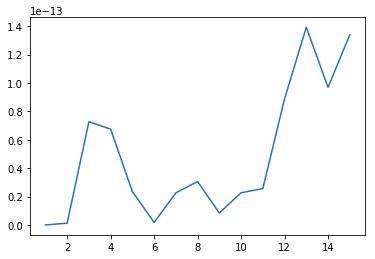

In [30]:
timesteps = np.linspace(1, len(p5totaldisp), len(p5totaldisp))

plt.figure()
plt.plot(timesteps, p5totaldisp)
plt.show()

In [31]:
auto = np.correlate(p5totaldisp, p5totaldisp, mode='full')
autocorr = auto[auto.size//2:]
autocorr

array([6.76922076e-26, 4.94996990e-26, 3.64343596e-26, 2.19860154e-26,
       1.40243766e-26, 1.34973415e-26, 1.01623451e-26, 1.19993766e-26,
       1.43537446e-26, 1.84021389e-26, 1.99237274e-26, 1.62522868e-26,
       9.85726058e-27, 1.64833817e-28, 0.00000000e+00])

In [32]:
p4totaldisp = onion_data.pull_particle(whichParticle=4)['TotalDisplacementSquared']

In [33]:
np.correlate(p4totaldisp, p5totaldisp)

array([3.28196740e-26, 2.81958421e-26])

In [34]:
onion_data.particleNumber

223

In [35]:
onion_data.particleEventArray/sum(onion_data.particleEventArray)

array([0.00213038, 0.00234342, 0.00276949, 0.00276949, 0.00298253,
       0.00319557, 0.00255646, 0.00234342, 0.00255646, 0.00234342,
       0.00234342, 0.00340861, 0.00255646, 0.00426076, 0.00276949,
       0.00340861, 0.00234342, 0.00234342, 0.00362164, 0.00681721,
       0.00766937, 0.00362164, 0.00852152, 0.00979974, 0.00426076,
       0.00703025, 0.00276949, 0.00362164, 0.00660418, 0.01469962,
       0.00553899, 0.00489987, 0.00319557, 0.00362164, 0.00276949,
       0.00255646, 0.00553899, 0.00681721, 0.00234342, 0.01299531,
       0.00340861, 0.00426076, 0.00255646, 0.0044738 , 0.00234342,
       0.00362164, 0.01193012, 0.00362164, 0.00340861, 0.00639114,
       0.00319557, 0.00298253, 0.00426076, 0.00362164, 0.00234342,
       0.00298253, 0.00404772, 0.00255646, 0.00383468, 0.00532595,
       0.0044738 , 0.00596506, 0.0044738 , 0.00276949, 0.00276949,
       0.00255646, 0.00319557, 0.00553899, 0.00489987, 0.0044738 ,
       0.00596506, 0.00383468, 0.00276949, 0.01001278, 0.02151

In [36]:
bead_data.particleEventArray/sum(bead_data.particleEventArray)

array([0.04383562, 0.03287671, 0.07671233, 0.03013699, 0.03561644,
       0.03561644, 0.03013699, 0.03013699, 0.03013699, 0.04931507,
       0.03287671, 0.06849315, 0.03287671, 0.03013699, 0.04383562,
       0.03287671, 0.04657534, 0.04383562, 0.04931507, 0.05479452,
       0.03287671, 0.06849315, 0.03287671, 0.03561644])

In [37]:
len(bead_data.particleEventArray) == bead_data.particleNumber

True

In [38]:
bead_data.particleEventArray

[16.0,
 12.0,
 28.0,
 11.0,
 13.0,
 13.0,
 11.0,
 11.0,
 11.0,
 18.0,
 12.0,
 25.0,
 12.0,
 11.0,
 16.0,
 12.0,
 17.0,
 16.0,
 18.0,
 20.0,
 12.0,
 25.0,
 12.0,
 13.0]

In [39]:
sum(bead_data.particleEventArray)

365.0

In [40]:
len(bead_data.pull_particle(whichParticle=2)['TotalDisplacementSquared'])

28

In [171]:
def find_correlations(data):
    datalen = data.particleNumber
    weights = np.array(data.particleEventArray/sum(data.particleEventArray))
    
    crosscorrelations = []
    displacementsqs = []
    autocorrelations = []
    auto_avg = []
    cross_avg = []
    bflow_fitparams = []
    bflow_paramerrs = []
    
    mean_autos = []
    for particle in range(0, datalen):
        totaldispsq = data.pull_particle(whichParticle=particle)['TotalDisplacementSquared']
        
        displacementsqs.append(totaldispsq)
        
        timesteps = np.linspace(1, len(totaldispsq), len(totaldispsq))
        fparams, pcov = curve_fit(bulk_flow_func, timesteps, totaldispsq)
        paramerrs = np.sqrt(np.diag(pcov))
        
        # curve fitting method
        bflow_fitparams.append(fparams)
        bflow_paramerrs.append(paramerrs)
        
        ### autocorrelations
        autocorrelation = np.correlate(totaldispsq, totaldispsq, mode="full")
        autocorrelation = autocorrelation[autocorrelation.size//2:]
        mean_auto = np.mean(autocorrelation)
        mean_autos.append(mean_auto)
        
        autocorrelations.append(autocorrelation)
    
    autocorrelations = np.array(autocorrelations)
    weighted_autos = np.array(mean_autos)*weights
    auto_avg.append(sum(weighted_autos))
    autoavgerrs = np.std(mean_autos)

    
    mean_of_means = []
    for i in range(len(displacementsqs)):
        current_crosses = []
        means = []
        
        for j in range(len(displacementsqs)):
            single_cross_corr = np.correlate(displacementsqs[i], displacementsqs[j])
            current_crosses.append(single_cross_corr)
            mean_corr = np.mean(single_cross_corr)
            means.append(mean_corr)
        
        current_crosses = np.array(current_crosses)
        crosscorrelations.append(current_crosses)
        
        mean_of_means.append(sum(np.array(means) * weights))
    
    cross_avg = np.array(mean_of_means)
    crossavgerrs = np.std(cross_avg)
    
    autocorrs = np.array(autocorrelations)
    crosscorrs = np.array(crosscorrelations)
    auto_avg = np.array(auto_avg)
    cross_avg = np.array(cross_avg)
    
    return autocorrs, auto_avg, crosscorrs, cross_avg, bflow_fitparams, bflow_paramerrs, autoavgerrs, crossavgerrs

In [143]:
midcelldata = BMC_data('Brownian_Middle_of_Cell.txt')
midcelldata.convert_units(onion_factor)
midcelldata.table.fillna(0)

x         y      time            dx            dy        dt  \
0     13.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000   
1      0.000015  0.000012  0.000000  0.000000e+00  0.000000e+00  0.000000   
2      0.000015  0.000012  0.033003  6.083172e-08  6.677925e-09  0.033003   
3      0.000015  0.000012  0.067007  3.516218e-08 -3.513291e-09  0.034003   
4      0.000016  0.000012  0.100010  4.240610e-08  1.413537e-08  0.033003   
5      0.000016  0.000012  0.133013  0.000000e+00  0.000000e+00  0.033003   
6      0.000015  0.000012  0.167017 -5.190000e-08 -1.730000e-08  0.034003   
7      0.000016  0.000012  0.200020  6.572987e-08 -1.139824e-09  0.033003   
8      0.000015  0.000012  0.233023 -6.572987e-08  1.139824e-09  0.033003   
9      0.000015  0.000012  0.266027 -7.958608e-08  1.681755e-07  0.033003   
10     0.000015  0.000012  0.300030 -4.417321e-08 -1.934533e-07  0.034003   
11     0.000015  0.000011  0.333033 -6.114907e-07 -7.099721e-07  0.033003   
12     0.000014  0.000011  0.367037 -3.327602e-07 -6.105753e-07  0.034003   
13     0.000014  0.000010  0.433043 -7.875016e-07 -1.065962e-06  0.066007   
14    12.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000   
15     0.000024  0.000011  0.000000  0.000000e+00  0.000000e+00  0.000000   
16     0.000024  0.000011  0.033003  3.300321e-08 -2.299638e-09  0.033003   
17     0.000024  0.000011  0.067007  7.526081e-08  1.477475e-08  0.034003   
18     0.000024  0.000011  0.100010 -5.254695e-08  5.386049e-09  0.033003   
19     0.000024  0.000011  0.133013  1.189243e-07 -2.166783e-08  0.033003   
20     0.000024  0.000011  0.167017 -1.215999e-07  3.100904e-08  0.034003   
21     0.000024  0.000011  0.200020 -2.281630e-08 -2.135381e-08  0.033003   
22     0.000024  0.000011  0.233023  9.144323e-08 -1.591938e-08  0.033003   
23     0.000024  0.000011  0.266027  4.806829e-08  6.661006e-09  0.033003   
24     0.000024  0.000011  0.300030  1.084222e-07  1.781326e-08  0.034003   
25     0.000024  0.000011  0.367037 -9.342131e-08 -1.973099e-08  0.067007   
26     0.000024  0.000011  0.433043  2.505514e-07 -5.569756e-08  0.066007   
27    16.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000   
28     0.000042  0.000009  0.000000  0.000000e+00  0.000000e+00  0.000000   
29     0.000042  0.000009  0.033003 -1.536713e-08 -2.010047e-08  0.033003   
...         ...       ...       ...           ...           ...       ...   
5410   0.000052  0.000022  0.800080 -6.319407e-08  2.360399e-08  0.034003   
5411   0.000052  0.000022  0.833083 -1.487917e-07 -2.189066e-08  0.033003   
5412   0.000052  0.000022  0.866087  6.277223e-10 -9.682207e-08  0.033003   
5413   0.000052  0.000022  0.899090 -1.220105e-07 -2.623150e-08  0.033003   
5414   0.000052  0.000022  0.933093  6.336188e-08  1.449442e-07  0.034003   
5415   0.000052  0.000022  0.966097 -1.842942e-08 -1.183985e-07  0.033003   
5416   0.000052  0.000022  0.999100  7.562649e-08  9.712574e-08  0.033003   
5417   0.000052  0.000022  1.033103 -7.176493e-08  6.704942e-09  0.034003   
5418   0.000052  0.000022  1.066107  7.176493e-08 -6.704942e-09  0.033003   
5419   0.000052  0.000022  1.099110 -5.728588e-08 -1.050136e-07  0.033003   
5420   0.000052  0.000022  1.133113 -3.030482e-08 -3.029843e-08  0.034003   
5421   0.000052  0.000022  1.166117  3.687702e-08 -3.077708e-08  0.033003   
5422   0.000052  0.000022  1.199120 -1.817259e-08  1.698317e-08  0.033003   
5423   0.000052  0.000022  1.233123  6.202019e-09  1.782088e-07  0.034003   
5424   0.000052  0.000022  1.266127 -5.565366e-08 -1.741915e-07  0.033003   
5425   0.000052  0.000022  1.299130  4.784300e-08 -3.233625e-08  0.033003   
5426   0.000052  0.000022  1.332133 -6.744858e-09  4.720101e-08  0.033003   
5427   0.000052  0.000022  1.366137 -6.334953e-08 -2.305718e-08  0.034003   
5428   0.000052  0.000022  1.399140  1.198046e-09 -2.191590e-09  0.033003   
5429   0.000052  0.000022  1.432143  3.626465e-08 -5.354102e-09  0.033003   
5430   0.0

In [105]:
bead_data.compute_diffusionAll(averaged=True)

(2.455164398334966e-13, 8.548438839751202e-14)

In [106]:
onion_data.compute_diffusionAll(averaged=True)

(1.7436273161831624e-13, 7.58676513407148e-14)

In [116]:
midcelldata.compute_diffusionAll(averaged=True)

1.4027017430104664e-13

In [140]:
closeup = BMC_data('Brownian_Close_Up.txt')
closeup.convert_units(onion_factor)
print(closeup.compute_diffusionAll(averaged=True))
print(midcelldata.compute_diffusionAll(averaged=True))
print(onion_data.compute_diffusionAll(averaged=True))

(1.7842295117565394e-13, 5.6330395488378255e-14)
1.4027017430104664e-13
(1.7436273161831624e-13, 7.58676513407148e-14)


In [141]:
#mid cell error
err = []
for i in range(0, midcelldata.particleNumber):
    current_err = midcelldata.compute_diffusionSingle(whichParticle = i)[1]
    err.append(current_err)
    
print(np.mean(err))

7.115222736767464e-14


In [172]:
bautocorr, bautoavg, bcrosscorrs, bcrossavg, bbflow_fp, bbflow_pe, bautoerr, bcrosserr = find_correlations(bead_data)

autocorrs, autoavg, crosscorrs, crossavg, bflow_fp, bflow_pe, autoerr, crosserr = find_correlations(onion_data)

mAC, mAA, mCC, mCA, mBFlowparam, mBFlowerr, mautoerr, mcrosserr = find_correlations(midcelldata)

In [173]:
cAC, cAA, cCC, cCA, cBflowparam, cBFlowerr, cautoerr, ccrosserr = find_correlations(closeup)

In [174]:
cAA, cautoerr

(array([3.98856696e-24]), 5.633703540897141e-24)

In [175]:
bautoavg, bautoerr

(array([3.39780971e-23]), 4.8750036378935135e-23)

In [176]:
autoavg, autoerr

(array([4.02191151e-24]), 9.548135848625944e-24)

In [178]:
mAA, mautoerr

(array([3.50092883e-24]), 1.2001272784349304e-23)

In [45]:
np.mean(mCA)

5.345905611294816e-27

In [46]:
np.mean(bcrossavg)

1.5000558500443632e-24

In [47]:
np.mean(crossavg)

3.1382371963519693e-27

In [48]:
np.max(crossavg)

4.299438541426468e-24

In [50]:
[np.min(crossavg), np.max(crossavg)]

[3.778088523389292e-32, 4.299438541426468e-24]

In [56]:
crossavg.shape

(223, 223)

In [146]:
autoavg

array([4.02191151e-24])

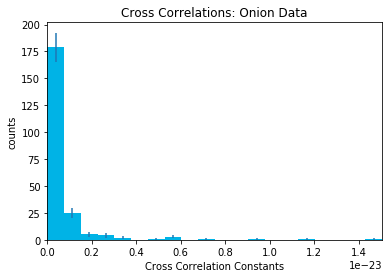

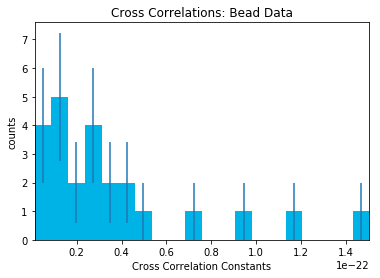

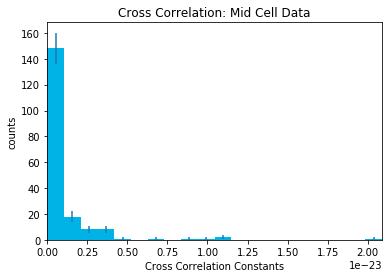

In [66]:
ocounts, obins, opatches, oerr = plot_histogram(crossavg, 'Cross Correlation Constants', 'counts',
                                                'Cross Correlations: Onion Data', nbins = 20, 
                                                limits = [np.min(crossavg), np.max(crossavg)])

bcounts, bbins, bpatches, berr = plot_histogram(bcrossavg, "Cross Correlation Constants", 'counts',
                                               'Cross Correlations: Bead Data', nbins = 20, 
                                                limits = [np.min(bcrossavg), np.max(bcrossavg)])

mcounts, mbins, mpatches, merr = plot_histogram(mCA, "Cross Correlation Constants", 'counts',
                                               'Cross Correlation: Mid Cell Data', nbins = 20,
                                               limits = [np.min(mCA), np.max(mCA)])

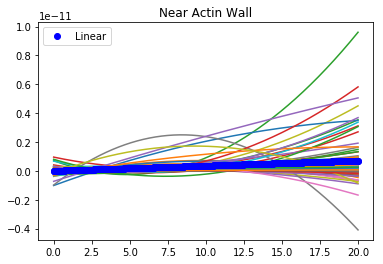

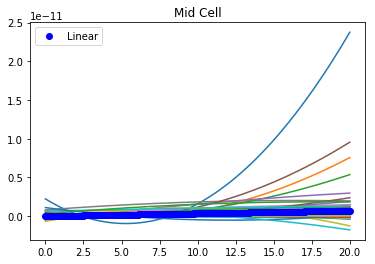

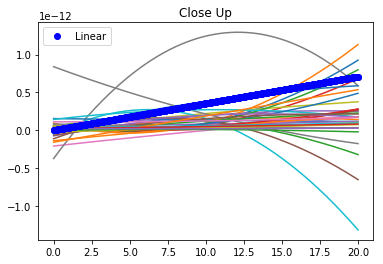

In [185]:
plt.figure()
plt.title("Near Actin Wall")
for params in bflow_fp:
    a = params[0]
    b = params[1]
    c = params[2]
    x = np.linspace(0,20, 1000)
    y = bulk_flow_func(x, a, b, c)
    plt.plot(x,y)
plt.plot(x, avggivenDiff*x, 'bo', label = 'Linear')
plt.legend()  

# plt.figure()
# plt.title("Beads")
# for params in bbflow_fp:
#     a = params[0]
#     b = params[1]
#     c = params[2]
#     x = np.linspace(0,20, 1000)
#     y = bulk_flow_func(x, a, b, c)
#     plt.plot(x,y)

plt.figure()
plt.title("Mid Cell")
for params in mBFlowparam:
    a = params[0]
    b = params[1]
    c = params[2]
    x = np.linspace(0,20, 1000)
    y = bulk_flow_func(x, a, b, c)
    plt.plot(x,y)
plt.plot(x, avggivenDiff*x, 'bo', label = 'Linear')
plt.legend()

plt.figure()
plt.title("Close Up")
for params in cBflowparam:
    a = params[0]
    b = params[1]
    c = params[2]
    x = np.linspace(0,20, 1000)
    y = bulk_flow_func(x, a, b, c)
    plt.plot(x,y)
plt.plot(x, avggivenDiff*x, 'bo', label = 'Linear')

plt.legend()
plt.show()


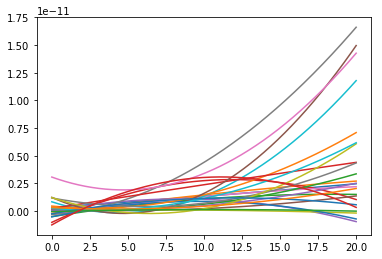

In [149]:
plt.figure()
for params in bbflow_fp:
    a = params[0]
    b = params[1]
    c = params[2]
    x = np.linspace(0,20, 1000)
    y = bulk_flow_func(x, a, b, c)
    plt.plot(x,y)
    
plt.show()
    

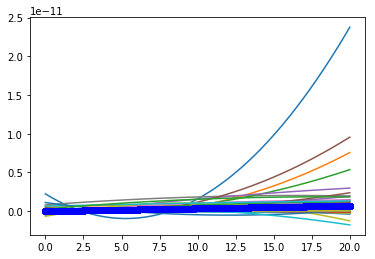

In [164]:
plt.figure()
for params in mBFlowparam:
    a = params[0]
    b = params[1]
    c = params[2]
    x = np.linspace(0,20, 1000)
    y = bulk_flow_func(x, a, b, c)
    plt.plot(x,y)
    plt.plot(x, avggivenDiff*x, 'bo')
    
plt.show()
    

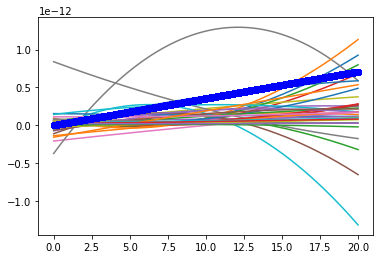

In [163]:
plt.figure()
for params in cBflowparam:
    a = params[0]
    b = params[1]
    c = params[2]
    x = np.linspace(0,20, 1000)
    y = bulk_flow_func(x, a, b, c)
    plt.plot(x,y)
    plt.plot(x, avggivenDiff*x, 'bo')
    
plt.show()
    

In [162]:
givenDiff = np.loadtxt('Diffusion Coefficients Actin.txt')
convertedDiff = givenDiff * 10**(-14) #m^2 /s
# print(convertedDiff)
avggivenDiff = np.mean(convertedDiff)
print(avggivenDiff)

3.546047387024583e-14
